# Problem Statement - Suicide Rate Analysis
## Context
Close to 800 000 people die due to suicide every year, which is one person every 40 seconds. Suicide is a global phenomenon and occurs throughout the lifespan. Effective and evidence-based interventions can be implemented at population, sub-population, and individual levels to prevent suicide and suicide attempts. There are indications that for each adult who died by suicide there may have been more than 20 others attempting suicide.

## Objective
The objective of this case study is to find the patterns for increased suicide rates among different cohorts globally, across the socioeconomic spectrum by using exploratory data analysis.

## Data Dictionary
We will be using the dataset about suicide rates from 1985 to 2016. This dataset has the following attributes:

- country: Country
- year: Year
- sex: Sex (male or female)
- age: Suicide age range, ages divided into six categories
- suicides_no: number of suicides
- population: population of that sex, in that age range, in that country, and in that year
- suicides/100k pop: Number of suicides per 100k population
- gdp_for_year($): GDP of the country in that year in dollars
- gdp_per_capita($): Ratio of the country’s GDP and its population
- generation: Generation of the suicides in question, being possible 6 different categories

## Questions to explore
- Is the suicide rate more prominent in some age categories than others?
- Which countries have the most and the least number of suicides?
- What is the effect of the population on suicide rates?
- What is the effect of the GDP of a country on suicide rates?
- What is the trend of suicide rates across all the years?
- Is there a difference between the suicide rates of men and women?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
LOCATION = r"C:\Users\William\Desktop\formação\mit\code\week1\case_study_suicide_rate\master.csv"

In [3]:
suicide_dataframe = pd.read_csv(LOCATION)
suicide_dataframe.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


## Is the suicide rate more prominent in some age categories than others?

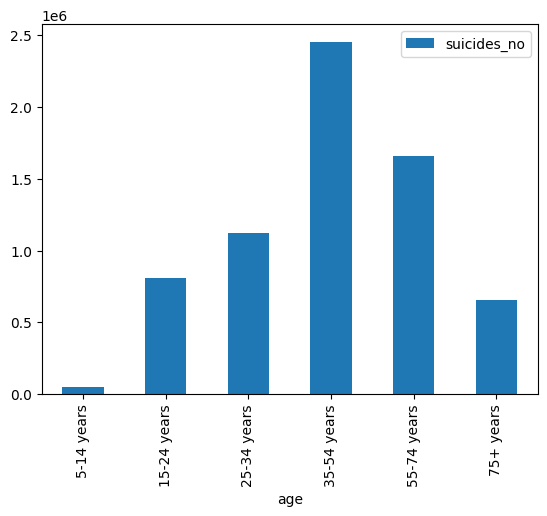

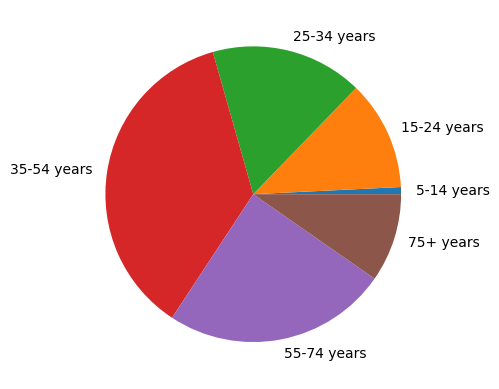

In [4]:
suicides_by_age = suicide_dataframe.groupby("age")["suicides_no"].sum().to_frame().reindex(["5-14 years", "15-24 years", "25-34 years", "35-54 years", "55-74 years", "75+ years"])
suicides_by_age.plot(kind="bar")
plt.show()
plt.pie(suicides_by_age["suicides_no"], labels=suicides_by_age.index)
plt.show()

## Which countries have the most and the least number of suicides?

In [5]:
suicides_by_country = suicide_dataframe.groupby("country")["suicides_no"].sum().sort_values()
suicides_by_country

country
Dominica                       0
Saint Kitts and Nevis          0
San Marino                     4
Antigua and Barbuda           11
Maldives                      20
                          ...   
Ukraine                   319950
France                    329127
Japan                     806902
United States            1034013
Russian Federation       1209742
Name: suicides_no, Length: 101, dtype: int64

## What is the effect of the population on suicide rates?

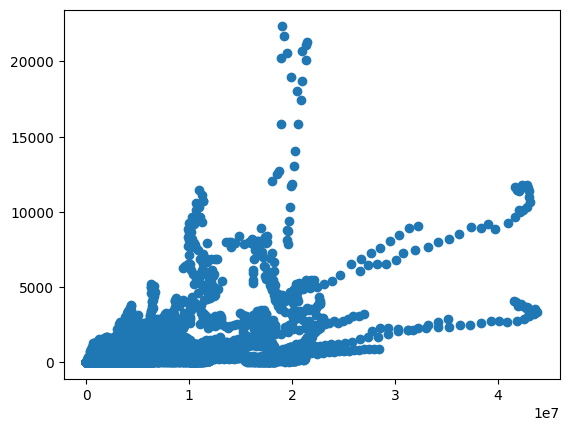

In [13]:
plt.scatter(suicide_dataframe["population"], suicide_dataframe["suicides_no"])

## What is the effect of the GDP of a country on suicide rates?

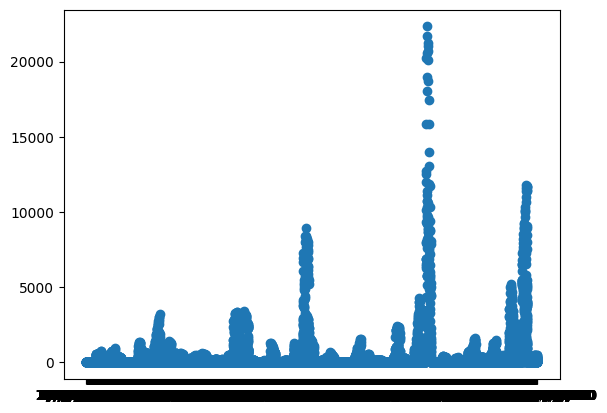

In [27]:
suicide_dataframe[" gdp_for_year ($) "]
# suicide_dataframe["gdp_for_year ($)"]
plt.scatter(suicide_dataframe[" gdp_for_year ($) "], suicide_dataframe["suicides_no"])

## What is the trend of suicide rates across all the years?

<Axes: xlabel='year'>

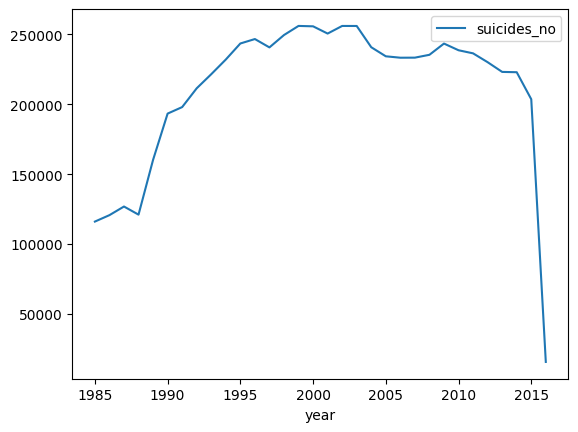

In [45]:
suicides_by_year = suicide_dataframe.groupby(["year"])["suicides_no"].sum().to_frame().sort_values("year")
suicides_by_year.plot()

## Is there a difference between the suicide rates of men and women?

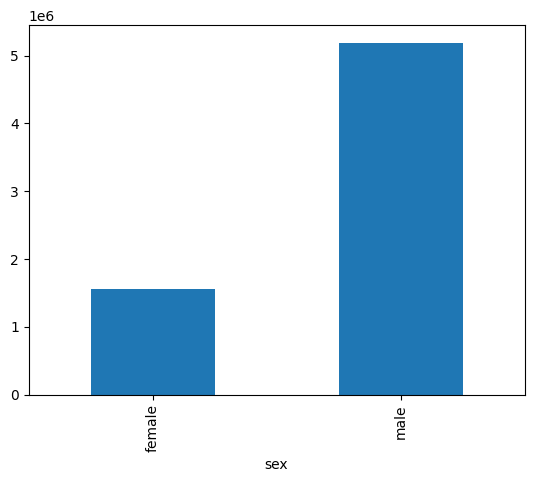

In [48]:
gender = suicide_dataframe.groupby("sex")["suicides_no"].sum().plot(kind="bar")